### Rendom Forest

#### Data Descripton

* Undergrad : person is under graduated or not
* Marital.Status : marital status of a person
* Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
* Work Experience : Work experience of an individual person
* Urban : Whether that person belongs to urban area or not


### Import libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier

### The Data

In [2]:
data = pd.read_csv('Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


### EDA

In [4]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
#covert into category
data['Taxable.Income'] = data['Taxable.Income'].apply(lambda x: 'risky' if x<=30000 else 'good')
data['City.Population'] = data['City.Population'].apply(lambda x: 'low' if x<=55208.375 else 'high')

<AxesSubplot:xlabel='Taxable.Income', ylabel='count'>

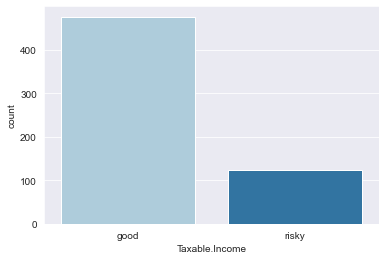

In [6]:
sns.set_style('darkgrid')
sns.countplot(x=data['Taxable.Income'],palette='Paired')

<AxesSubplot:xlabel='Taxable.Income', ylabel='Work.Experience'>

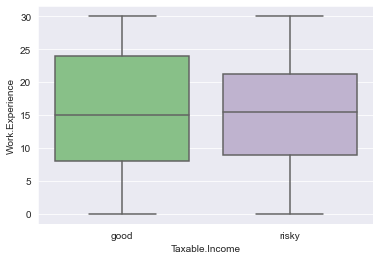

In [7]:
sns.boxplot(y=data['Work.Experience'],x=data['Taxable.Income'],palette='Accent')

In [8]:
#One Hot Encoding
data_dummies = pd.get_dummies(data.drop(['Work.Experience'],axis=1),drop_first=True)

#label encoding 
data_dummies['Work.Experience'] = LabelEncoder().fit_transform(data['Work.Experience'])
data_dummies.head()

,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Taxable.Income_risky,City.Population_low,Urban_YES,Work.Experience
0,0,0,1,0,1,1,10
1,1,0,0,0,0,1,18
2,0,1,0,0,0,1,30
3,1,0,1,0,0,1,15
4,0,1,0,0,1,0,28


### Train test splits

In [9]:
X = data_dummies.drop('Taxable.Income_risky',axis=1).values
y = data_dummies['Taxable.Income_risky'].values

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

### Random Forest Classifier

In [32]:
forest = RandomForestClassifier(n_estimators=100,criterion='gini')
forest.fit(X_train,y_train)

RandomForestClassifier()

In [33]:
pred = forest.predict(X_test)

### Evaluation

In [34]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[135   8]
 [ 34   3]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.87       143
           1       0.27      0.08      0.12        37

    accuracy                           0.77       180
   macro avg       0.54      0.51      0.50       180
weighted avg       0.69      0.77      0.71       180



### KFold Validation - Random Forest Classifier

In [72]:
kfold = KFold(n_splits=15,random_state=7,shuffle=True)
model = RandomForestClassifier(n_estimators=100,criterion='gini')
results = cross_val_score(model,X,y,cv=kfold)

In [74]:
results

array([0.675, 0.85 , 0.625, 0.8  , 0.725, 0.675, 0.625, 0.675, 0.675,
       0.725, 0.625, 0.575, 0.725, 0.775, 0.8  ])